In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 원형 wafer map의 반경 정의
radius = 1

# 원형 내부의 포인트 생성
y, x = np.ogrid[-radius:radius:100j, -radius:radius:100j]
mask = x**2 + y**2 <= radius**2

# 포인트의 값 생성 (예: 랜덤 값)
values = np.random.rand(100, 100) * mask

# 원형 wafer map 그리기
fig, ax = plt.subplots(figsize=(6, 6))
ax.set_aspect('equal', 'box')
ax.imshow(values, extent=(-radius, radius, -radius, radius), cmap='viridis', interpolation='none')
ax.set_xlim(-radius, radius)
ax.set_ylim(-radius, radius)

plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def generate_wafer_map(size):
    """ 웨이퍼 맵 시뮬레이션을 생성합니다. """
    wafer = np.zeros((size, size))
    
    # 웨이퍼 중심
    cx, cy = size // 2, size // 2

    for x in range(size):
        for y in range(size):
            distance_to_center = np.sqrt((x - cx)**2 + (y - cy)**2)
            
            if distance_to_center < size // 2:
                # 웨이퍼 내부의 임의의 결함을 시뮬레이션
                if np.random.rand() < 0.05:
                    wafer[x, y] = 1  # 결함
    
    return wafer

size = 300
wafer_map = generate_wafer_map(size)

plt.imshow(wafer_map, extent=[0, size, size, 0], cmap="gray_r")
plt.title('Simulated Wafer Map')
plt.axis('off')
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.interpolate import griddata

def draw_circle(values):
    if len(values) != 121:
        raise ValueError("Please provide exactly 121 values")

    # 11x11 격자의 원래 포인트
    x = np.linspace(-5, 5, 11)
    y = np.linspace(-5, 5, 11)
    X, Y = np.meshgrid(x, y)
    Z = np.array(values).reshape(11, 11)

    # 더 높은 해상도로 세분화된 격자
    xi = np.linspace(-5.5, 5.5, 500)
    yi = np.linspace(-5.5, 5.5, 500)
    Xi, Yi = np.meshgrid(xi, yi)

    # 데이터 보간
    Zi = griddata((X.flatten(), Y.flatten()), Z.flatten(), (Xi, Yi), method='linear')

    # 원의 경계 밖의 값은 NaN으로 설정
    Ri = np.sqrt(Xi**2 + Yi**2)
    Zi[Ri > 5.5] = np.nan

    fig, ax = plt.subplots(figsize=(6,6))
    im = ax.imshow(Zi, cmap='jet', origin='lower', extent=(-5.5,5.5,-5.5,5.5))
    ax.axis('off')
    plt.colorbar(im)
    plt.show()


# 엑셀 파일에서 값을 읽어옴
df = pd.read_excel('c:/121.xlsx', engine='openpyxl') 
# 'your_file.xlsx'는 당신의 엑셀 파일 경로와 이름을 입력해주세요. 

# 값들을 리스트로 변환
values = df['value'].tolist() 
# 'ColumnName'은 엑셀 파일의 해당하는 열 이름을 입력해주세요.

draw_circle(values)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
import pandas as pd

def generate_circle_points(n, r):
    angles = np.linspace(0, 2*np.pi, n, endpoint=False)
    x = r * np.cos(angles)
    y = r * np.sin(angles)
    return x, y

# 원의 반지름과 해당 원 위의 포인트 수
radii = [1, 2, 3, 4, 5]
points_on_circle = [8, 16, 24, 32, 40]

X, Y = [], []

# 각 원에 대한 포인트 생성
for r, n in zip(radii, points_on_circle):
    x, y = generate_circle_points(n, r)
    X.extend(x)
    Y.extend(y)

# 중심점 추가
X.append(0)
Y.append(0)


# X, Y는 이제 포인트들의 좌표를 포함하고 있습니다.
# 위에서 제공한 draw_circle_interpolated 함수를 수정하여 이 좌표를 사용할 수 있습니다.
def draw_circle_interpolated(X, Y, values):
    if len(values) != len(X):
        raise ValueError("Please provide a correct number of values")

    # Data interpolation on a high-resolution grid
    xi = np.linspace(-6.5, 6.5, 500)
    yi = np.linspace(-6.5, 6.5, 500)
    Xi, Yi = np.meshgrid(xi, yi)

    # Interpolate the data
    Zi = griddata((X, Y), values, (Xi, Yi), method='linear')

    # Set values outside of the circle's boundary to NaN
    Ri = np.sqrt(Xi**2 + Yi**2)
    Zi[Ri > 6.5] = np.nan

    fig, ax = plt.subplots(figsize=(6,6))
    c = ax.pcolormesh(Xi, Yi, Zi, shading='auto', cmap='jet')
    ax.set_aspect('equal', 'box')
    fig.colorbar(c, ax=ax)
    plt.show()


# x, y 좌표
X = [
    0.00000000, 2.376E-15, -13.717871, -19.400000, -13.717871, 0.00000000,
    13.7178715, 19.4000000, 13.7178715, 4.751E-15, -14.848117, -27.435743,
    -35.846525, -38.800000, -35.846525, -27.435743, -14.848117, 0.00000000,
    14.8481171, 27.4357431, 35.8465258, 38.8000000, 35.8465258, 27.4357431,
    14.8481171, -1.872E-14, -15.063268, -29.100000, -41.153614, -50.402678,
    -56.216883, -58.200000, -56.216883, -50.402678, -41.153614, -29.100000,
    -15.063268, 0.00000000, 15.0632684, 29.1000000, 41.1536146, 50.4026785,
    56.2168830, 58.2000000, 56.2168830, 50.4026785, 41.1536146, 29.1000000,
    15.0632684, -5.942E-14, -15.139008, -29.696234, -43.112250, -54.871486,
    -64.522041, -71.693051, -76.108937, -77.600000, -76.108937, -71.693051,
    -64.522041, -54.871486, -43.112250, -29.696234, -15.139008, 0.00000000,
    15.1390089, 29.6962343, 43.1122500, 54.8714862, 64.5220419, 71.6930517,
    76.1089377, 77.6000000, 76.1089377, 71.6930517, 64.5220419, 54.8714862,
    43.1122500, 29.6962343, 15.1390089, 1.188E-14, -15.174143, -29.974648,
    -44.037078, -57.015169, -68.589357, -78.474648, -86.427632, -92.252482,
    -95.805769, -97.000000, -95.805769, -92.252482, -86.427632, -78.474648,
    -68.589357, -57.015169, -44.037078, -29.974648, -15.174143, 0.00000000,
    15.1741431, 29.9746484, 44.0370784, 57.0151694, 68.5893577, 78.4746484,
    86.4276328, 92.2524820, 95.8057690, 97.0000000, 95.8057690, 92.2524820,
    86.4276328, 78.4746484, 68.5893577, 57.0151694, 44.0370784, 29.9746484,
    15.1741431
]

# y 좌표
Y = [
    0.00000000, 19.4000000, 13.7178715, 3.564E-15, -13.717871, -19.400000, -13.717871, -1.188E-15, 
    13.7178715, 38.8000000, 35.8465258, 27.4357431, 14.8481171, 7.127E-15, -14.848117, -27.435743, 
    -35.846525, -38.800000, -35.846525, -27.435743, -14.848117, -2.376E-15, 14.8481171, 27.4357431, 
    35.8465258, 58.2000000, 56.2168830, 50.4026785, 41.1536146, 29.1000000, 15.0632684, 1.069E-14, 
    -15.063268, -29.100000, -41.153614, -50.402678, -56.216883, -58.200000, -56.216883, -50.402678, 
    -41.153614, -29.100000, -15.063268, -1.649E-14, 15.0632684, 29.1000000, 41.1536146, 50.4026785, 
    56.2168830, 77.6000000, 76.1089377, 71.6930517, 64.5220419, 54.8714862, 43.1122500, 29.6962343, 
    15.1390089, -1.925E-13, -15.139008, -29.696234, -43.112250, -54.871486, -64.522041, -71.693051, 
    -76.108937, -77.600000, -76.108937, -71.693051, -64.522041, -54.871486, -43.112250, -29.696234, 
    -15.139008, -4.751E-15, 15.1390089, 29.6962343, 43.1122500, 54.8714862, 64.5220419, 71.6930517, 
    76.1089377, 97.0000000, 95.8057690, 92.2524820, 86.4276328, 78.4746484, 68.5893577, 57.0151694, 
    44.0370784, 29.9746484, 15.1741431, 1.782E-14, -15.174143, -29.974648, -44.037078, -57.015169, 
    -68.589357, -78.474648, -86.427632, -92.252482, -95.805769, -97.000000, -95.805769, -92.252482, 
    -86.427632, -78.474648, -68.589357, -57.015169, -44.037078, -29.974648, -15.174143, -5.939E-15, 
    15.1741431, 29.9746484, 44.0370784, 57.0151694, 68.5893577, 78.4746484, 86.4276328, 92.2524820, 
    95.8057690
]

# 엑셀 파일에서 값을 읽어옴
df = pd.read_excel('c:/121.xlsx', engine='openpyxl') 
# 'your_file.xlsx'는 당신의 엑셀 파일 경로와 이름을 입력해주세요. 

# 값들을 리스트로 변환
values = df['value'].tolist() 
# 'ColumnName'은 엑셀 파일의 해당하는 열 이름을 입력해주세요.

draw_circle_interpolated(X,Y, values)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


# x, y 좌표
X = [
    0.00000000, 2.376E-15, -13.717871, -19.400000, -13.717871, 0.00000000,
    13.7178715, 19.4000000, 13.7178715, 4.751E-15, -14.848117, -27.435743,
    -35.846525, -38.800000, -35.846525, -27.435743, -14.848117, 0.00000000,
    14.8481171, 27.4357431, 35.8465258, 38.8000000, 35.8465258, 27.4357431,
    14.8481171, -1.872E-14, -15.063268, -29.100000, -41.153614, -50.402678,
    -56.216883, -58.200000, -56.216883, -50.402678, -41.153614, -29.100000,
    -15.063268, 0.00000000, 15.0632684, 29.1000000, 41.1536146, 50.4026785,
    56.2168830, 58.2000000, 56.2168830, 50.4026785, 41.1536146, 29.1000000,
    15.0632684, -5.942E-14, -15.139008, -29.696234, -43.112250, -54.871486,
    -64.522041, -71.693051, -76.108937, -77.600000, -76.108937, -71.693051,
    -64.522041, -54.871486, -43.112250, -29.696234, -15.139008, 0.00000000,
    15.1390089, 29.6962343, 43.1122500, 54.8714862, 64.5220419, 71.6930517,
    76.1089377, 77.6000000, 76.1089377, 71.6930517, 64.5220419, 54.8714862,
    43.1122500, 29.6962343, 15.1390089, 1.188E-14, -15.174143, -29.974648,
    -44.037078, -57.015169, -68.589357, -78.474648, -86.427632, -92.252482,
    -95.805769, -97.000000, -95.805769, -92.252482, -86.427632, -78.474648,
    -68.589357, -57.015169, -44.037078, -29.974648, -15.174143, 0.00000000,
    15.1741431, 29.9746484, 44.0370784, 57.0151694, 68.5893577, 78.4746484,
    86.4276328, 92.2524820, 95.8057690, 97.0000000, 95.8057690, 92.2524820,
    86.4276328, 78.4746484, 68.5893577, 57.0151694, 44.0370784, 29.9746484,
    15.1741431
]

# y 좌표
Y = [
    0.00000000, 19.4000000, 13.7178715, 3.564E-15, -13.717871, -19.400000, -13.717871, -1.188E-15, 
    13.7178715, 38.8000000, 35.8465258, 27.4357431, 14.8481171, 7.127E-15, -14.848117, -27.435743, 
    -35.846525, -38.800000, -35.846525, -27.435743, -14.848117, -2.376E-15, 14.8481171, 27.4357431, 
    35.8465258, 58.2000000, 56.2168830, 50.4026785, 41.1536146, 29.1000000, 15.0632684, 1.069E-14, 
    -15.063268, -29.100000, -41.153614, -50.402678, -56.216883, -58.200000, -56.216883, -50.402678, 
    -41.153614, -29.100000, -15.063268, -1.649E-14, 15.0632684, 29.1000000, 41.1536146, 50.4026785, 
    56.2168830, 77.6000000, 76.1089377, 71.6930517, 64.5220419, 54.8714862, 43.1122500, 29.6962343, 
    15.1390089, -1.925E-13, -15.139008, -29.696234, -43.112250, -54.871486, -64.522041, -71.693051, 
    -76.108937, -77.600000, -76.108937, -71.693051, -64.522041, -54.871486, -43.112250, -29.696234, 
    -15.139008, -4.751E-15, 15.1390089, 29.6962343, 43.1122500, 54.8714862, 64.5220419, 71.6930517, 
    76.1089377, 97.0000000, 95.8057690, 92.2524820, 86.4276328, 78.4746484, 68.5893577, 57.0151694, 
    44.0370784, 29.9746484, 15.1741431, 1.782E-14, -15.174143, -29.974648, -44.037078, -57.015169, 
    -68.589357, -78.474648, -86.427632, -92.252482, -95.805769, -97.000000, -95.805769, -92.252482, 
    -86.427632, -78.474648, -68.589357, -57.015169, -44.037078, -29.974648, -15.174143, -5.939E-15, 
    15.1741431, 29.9746484, 44.0370784, 57.0151694, 68.5893577, 78.4746484, 86.4276328, 92.2524820, 
    95.8057690
]

# 엑셀 파일에서 값을 읽어옴
df = pd.read_excel('c:/121.xlsx', engine='openpyxl')

# 값들을 리스트로 변환
values = df['value'].tolist()

# 웨이퍼 맵 그리기
plt.figure(figsize=(10, 10))
plt.scatter(X, Y, c=values, cmap='viridis', s=100)  # c는 색상을 나타내는 값으로 values를 사용합니다.
plt.colorbar()
plt.axis('equal')  # x, y 축의 범위를 동일하게 설정하여 웨이퍼의 모양을 유지합니다.
plt.title('Wafer Map')
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


# x, y 좌표
X = [
    0.00000000, 2.376E-15, -13.717871, -19.400000, -13.717871, 0.00000000,
    13.7178715, 19.4000000, 13.7178715, 4.751E-15, -14.848117, -27.435743,
    -35.846525, -38.800000, -35.846525, -27.435743, -14.848117, 0.00000000,
    14.8481171, 27.4357431, 35.8465258, 38.8000000, 35.8465258, 27.4357431,
    14.8481171, -1.872E-14, -15.063268, -29.100000, -41.153614, -50.402678,
    -56.216883, -58.200000, -56.216883, -50.402678, -41.153614, -29.100000,
    -15.063268, 0.00000000, 15.0632684, 29.1000000, 41.1536146, 50.4026785,
    56.2168830, 58.2000000, 56.2168830, 50.4026785, 41.1536146, 29.1000000,
    15.0632684, -5.942E-14, -15.139008, -29.696234, -43.112250, -54.871486,
    -64.522041, -71.693051, -76.108937, -77.600000, -76.108937, -71.693051,
    -64.522041, -54.871486, -43.112250, -29.696234, -15.139008, 0.00000000,
    15.1390089, 29.6962343, 43.1122500, 54.8714862, 64.5220419, 71.6930517,
    76.1089377, 77.6000000, 76.1089377, 71.6930517, 64.5220419, 54.8714862,
    43.1122500, 29.6962343, 15.1390089, 1.188E-14, -15.174143, -29.974648,
    -44.037078, -57.015169, -68.589357, -78.474648, -86.427632, -92.252482,
    -95.805769, -97.000000, -95.805769, -92.252482, -86.427632, -78.474648,
    -68.589357, -57.015169, -44.037078, -29.974648, -15.174143, 0.00000000,
    15.1741431, 29.9746484, 44.0370784, 57.0151694, 68.5893577, 78.4746484,
    86.4276328, 92.2524820, 95.8057690, 97.0000000, 95.8057690, 92.2524820,
    86.4276328, 78.4746484, 68.5893577, 57.0151694, 44.0370784, 29.9746484,
    15.1741431
]

# y 좌표
Y = [
    0.00000000, 19.4000000, 13.7178715, 3.564E-15, -13.717871, -19.400000, -13.717871, -1.188E-15, 
    13.7178715, 38.8000000, 35.8465258, 27.4357431, 14.8481171, 7.127E-15, -14.848117, -27.435743, 
    -35.846525, -38.800000, -35.846525, -27.435743, -14.848117, -2.376E-15, 14.8481171, 27.4357431, 
    35.8465258, 58.2000000, 56.2168830, 50.4026785, 41.1536146, 29.1000000, 15.0632684, 1.069E-14, 
    -15.063268, -29.100000, -41.153614, -50.402678, -56.216883, -58.200000, -56.216883, -50.402678, 
    -41.153614, -29.100000, -15.063268, -1.649E-14, 15.0632684, 29.1000000, 41.1536146, 50.4026785, 
    56.2168830, 77.6000000, 76.1089377, 71.6930517, 64.5220419, 54.8714862, 43.1122500, 29.6962343, 
    15.1390089, -1.925E-13, -15.139008, -29.696234, -43.112250, -54.871486, -64.522041, -71.693051, 
    -76.108937, -77.600000, -76.108937, -71.693051, -64.522041, -54.871486, -43.112250, -29.696234, 
    -15.139008, -4.751E-15, 15.1390089, 29.6962343, 43.1122500, 54.8714862, 64.5220419, 71.6930517, 
    76.1089377, 97.0000000, 95.8057690, 92.2524820, 86.4276328, 78.4746484, 68.5893577, 57.0151694, 
    44.0370784, 29.9746484, 15.1741431, 1.782E-14, -15.174143, -29.974648, -44.037078, -57.015169, 
    -68.589357, -78.474648, -86.427632, -92.252482, -95.805769, -97.000000, -95.805769, -92.252482, 
    -86.427632, -78.474648, -68.589357, -57.015169, -44.037078, -29.974648, -15.174143, -5.939E-15, 
    15.1741431, 29.9746484, 44.0370784, 57.0151694, 68.5893577, 78.4746484, 86.4276328, 92.2524820, 
    95.8057690
]

# 엑셀 파일에서 값을 읽어옴
df = pd.read_excel('c:/121.xlsx', engine='openpyxl')

# 값들을 리스트로 변환
values = df['value'].tolist()

# 웨이퍼 맵 그리기
plt.figure(figsize=(10, 10))
plt.scatter(X, Y, c=values, cmap='jet', s=2000, vmin=120, vmax=145, alpha=0.9)  # vmin과 vmax로 색상 범위를 설정합니다.
plt.colorbar()
plt.axis('equal')  # x, y 축의 범위를 동일하게 설정하여 웨이퍼의 모양을 유지합니다.
plt.title('Wafer Map')
plt.show()



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as mcolors


# x, y 좌표
X = [
    0.00000000, 2.376E-15, -13.717871, -19.400000, -13.717871, 0.00000000,
    13.7178715, 19.4000000, 13.7178715, 4.751E-15, -14.848117, -27.435743,
    -35.846525, -38.800000, -35.846525, -27.435743, -14.848117, 0.00000000,
    14.8481171, 27.4357431, 35.8465258, 38.8000000, 35.8465258, 27.4357431,
    14.8481171, -1.872E-14, -15.063268, -29.100000, -41.153614, -50.402678,
    -56.216883, -58.200000, -56.216883, -50.402678, -41.153614, -29.100000,
    -15.063268, 0.00000000, 15.0632684, 29.1000000, 41.1536146, 50.4026785,
    56.2168830, 58.2000000, 56.2168830, 50.4026785, 41.1536146, 29.1000000,
    15.0632684, -5.942E-14, -15.139008, -29.696234, -43.112250, -54.871486,
    -64.522041, -71.693051, -76.108937, -77.600000, -76.108937, -71.693051,
    -64.522041, -54.871486, -43.112250, -29.696234, -15.139008, 0.00000000,
    15.1390089, 29.6962343, 43.1122500, 54.8714862, 64.5220419, 71.6930517,
    76.1089377, 77.6000000, 76.1089377, 71.6930517, 64.5220419, 54.8714862,
    43.1122500, 29.6962343, 15.1390089, 1.188E-14, -15.174143, -29.974648,
    -44.037078, -57.015169, -68.589357, -78.474648, -86.427632, -92.252482,
    -95.805769, -97.000000, -95.805769, -92.252482, -86.427632, -78.474648,
    -68.589357, -57.015169, -44.037078, -29.974648, -15.174143, 0.00000000,
    15.1741431, 29.9746484, 44.0370784, 57.0151694, 68.5893577, 78.4746484,
    86.4276328, 92.2524820, 95.8057690, 97.0000000, 95.8057690, 92.2524820,
    86.4276328, 78.4746484, 68.5893577, 57.0151694, 44.0370784, 29.9746484,
    15.1741431
]

# y 좌표
Y = [
    0.00000000, 19.4000000, 13.7178715, 3.564E-15, -13.717871, -19.400000, -13.717871, -1.188E-15, 
    13.7178715, 38.8000000, 35.8465258, 27.4357431, 14.8481171, 7.127E-15, -14.848117, -27.435743, 
    -35.846525, -38.800000, -35.846525, -27.435743, -14.848117, -2.376E-15, 14.8481171, 27.4357431, 
    35.8465258, 58.2000000, 56.2168830, 50.4026785, 41.1536146, 29.1000000, 15.0632684, 1.069E-14, 
    -15.063268, -29.100000, -41.153614, -50.402678, -56.216883, -58.200000, -56.216883, -50.402678, 
    -41.153614, -29.100000, -15.063268, -1.649E-14, 15.0632684, 29.1000000, 41.1536146, 50.4026785, 
    56.2168830, 77.6000000, 76.1089377, 71.6930517, 64.5220419, 54.8714862, 43.1122500, 29.6962343, 
    15.1390089, -1.925E-13, -15.139008, -29.696234, -43.112250, -54.871486, -64.522041, -71.693051, 
    -76.108937, -77.600000, -76.108937, -71.693051, -64.522041, -54.871486, -43.112250, -29.696234, 
    -15.139008, -4.751E-15, 15.1390089, 29.6962343, 43.1122500, 54.8714862, 64.5220419, 71.6930517, 
    76.1089377, 97.0000000, 95.8057690, 92.2524820, 86.4276328, 78.4746484, 68.5893577, 57.0151694, 
    44.0370784, 29.9746484, 15.1741431, 1.782E-14, -15.174143, -29.974648, -44.037078, -57.015169, 
    -68.589357, -78.474648, -86.427632, -92.252482, -95.805769, -97.000000, -95.805769, -92.252482, 
    -86.427632, -78.474648, -68.589357, -57.015169, -44.037078, -29.974648, -15.174143, -5.939E-15, 
    15.1741431, 29.9746484, 44.0370784, 57.0151694, 68.5893577, 78.4746484, 86.4276328, 92.2524820, 
    95.8057690
]

# 엑셀 파일에서 값을 읽어옴
df = pd.read_excel('c:/121.xlsx', engine='openpyxl')

# 값들을 리스트로 변환
values = df['value'].tolist()


# 컬러맵 설정
cmap = plt.get_cmap('jet')
norm = mcolors.Normalize(vmin=min(values), vmax=max(values))
colors = cmap(norm(values))

# 데이터 크기 및 투명도 설정
s = 500  # 포인트 크기
alpha = 0.7  # 포인트 투명도

# 웨이퍼 맵 그리기
plt.figure(figsize=(10, 10))
plt.scatter(X, Y, c=colors, s=s, vmin=130, vmax=145, alpha=alpha)
plt.colorbar()
plt.axis('equal')
plt.title('Wafer Map')
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# x, y 좌표
X = [
    0.00000000, 2.376E-15, -13.717871, -19.400000, -13.717871, 0.00000000,
    13.7178715, 19.4000000, 13.7178715, 4.751E-15, -14.848117, -27.435743,
    -35.846525, -38.800000, -35.846525, -27.435743, -14.848117, 0.00000000,
    14.8481171, 27.4357431, 35.8465258, 38.8000000, 35.8465258, 27.4357431,
    14.8481171, -1.872E-14, -15.063268, -29.100000, -41.153614, -50.402678,
    -56.216883, -58.200000, -56.216883, -50.402678, -41.153614, -29.100000,
    -15.063268, 0.00000000, 15.0632684, 29.1000000, 41.1536146, 50.4026785,
    56.2168830, 58.2000000, 56.2168830, 50.4026785, 41.1536146, 29.1000000,
    15.0632684, -5.942E-14, -15.139008, -29.696234, -43.112250, -54.871486,
    -64.522041, -71.693051, -76.108937, -77.600000, -76.108937, -71.693051,
    -64.522041, -54.871486, -43.112250, -29.696234, -15.139008, 0.00000000,
    15.1390089, 29.6962343, 43.1122500, 54.8714862, 64.5220419, 71.6930517,
    76.1089377, 77.6000000, 76.1089377, 71.6930517, 64.5220419, 54.8714862,
    43.1122500, 29.6962343, 15.1390089, 1.188E-14, -15.174143, -29.974648,
    -44.037078, -57.015169, -68.589357, -78.474648, -86.427632, -92.252482,
    -95.805769, -97.000000, -95.805769, -92.252482, -86.427632, -78.474648,
    -68.589357, -57.015169, -44.037078, -29.974648, -15.174143, 0.00000000,
    15.1741431, 29.9746484, 44.0370784, 57.0151694, 68.5893577, 78.4746484,
    86.4276328, 92.2524820, 95.8057690, 97.0000000, 95.8057690, 92.2524820,
    86.4276328, 78.4746484, 68.5893577, 57.0151694, 44.0370784, 29.9746484,
    15.1741431
]

# y 좌표
Y = [
    0.00000000, 19.4000000, 13.7178715, 3.564E-15, -13.717871, -19.400000, -13.717871, -1.188E-15, 
    13.7178715, 38.8000000, 35.8465258, 27.4357431, 14.8481171, 7.127E-15, -14.848117, -27.435743, 
    -35.846525, -38.800000, -35.846525, -27.435743, -14.848117, -2.376E-15, 14.8481171, 27.4357431, 
    35.8465258, 58.2000000, 56.2168830, 50.4026785, 41.1536146, 29.1000000, 15.0632684, 1.069E-14, 
    -15.063268, -29.100000, -41.153614, -50.402678, -56.216883, -58.200000, -56.216883, -50.402678, 
    -41.153614, -29.100000, -15.063268, -1.649E-14, 15.0632684, 29.1000000, 41.1536146, 50.4026785, 
    56.2168830, 77.6000000, 76.1089377, 71.6930517, 64.5220419, 54.8714862, 43.1122500, 29.6962343, 
    15.1390089, -1.925E-13, -15.139008, -29.696234, -43.112250, -54.871486, -64.522041, -71.693051, 
    -76.108937, -77.600000, -76.108937, -71.693051, -64.522041, -54.871486, -43.112250, -29.696234, 
    -15.139008, -4.751E-15, 15.1390089, 29.6962343, 43.1122500, 54.8714862, 64.5220419, 71.6930517, 
    76.1089377, 97.0000000, 95.8057690, 92.2524820, 86.4276328, 78.4746484, 68.5893577, 57.0151694, 
    44.0370784, 29.9746484, 15.1741431, 1.782E-14, -15.174143, -29.974648, -44.037078, -57.015169, 
    -68.589357, -78.474648, -86.427632, -92.252482, -95.805769, -97.000000, -95.805769, -92.252482, 
    -86.427632, -78.474648, -68.589357, -57.015169, -44.037078, -29.974648, -15.174143, -5.939E-15, 
    15.1741431, 29.9746484, 44.0370784, 57.0151694, 68.5893577, 78.4746484, 86.4276328, 92.2524820, 
    95.8057690
]


# 엑셀 파일에서 값을 읽어옴
df = pd.read_excel('c:/121.xlsx', engine='openpyxl')

# 값들을 리스트로 변환
values = df['value'].tolist()

# 그라데이션을 표시할 원형 웨이퍼 맵 생성
fig, ax = plt.subplots(figsize=(10, 10))
ax.set_aspect('equal')
ax.set_xlim(min(X), max(X))
ax.set_ylim(min(Y), max(Y))

# # 각 포인트 간의 거리를 계산하고 그에 따라 그라데이션 표시
# for i in range(len(X)):
#     for j in range(len(X)):
#         distance = np.sqrt((X[i] - X[j]) ** 2 + (Y[i] - Y[j]) ** 2)
#         color = plt.cm.jet((values[i] + values[j]) / 2 / 145)  # 값을 정규화하여 색상을 선택합니다.
#         ax.plot([X[i], X[j]], [Y[i], Y[j]], color=color, linewidth=2)

# 웨이퍼 맵에 포인트 표시
scatter = ax.scatter(X, Y, c=values, cmap='jet', s=200, vmin=120, vmax=145)
plt.colorbar(scatter, ax=ax)
plt.title('Wafer Map with Gradient Between Points')
plt.show()


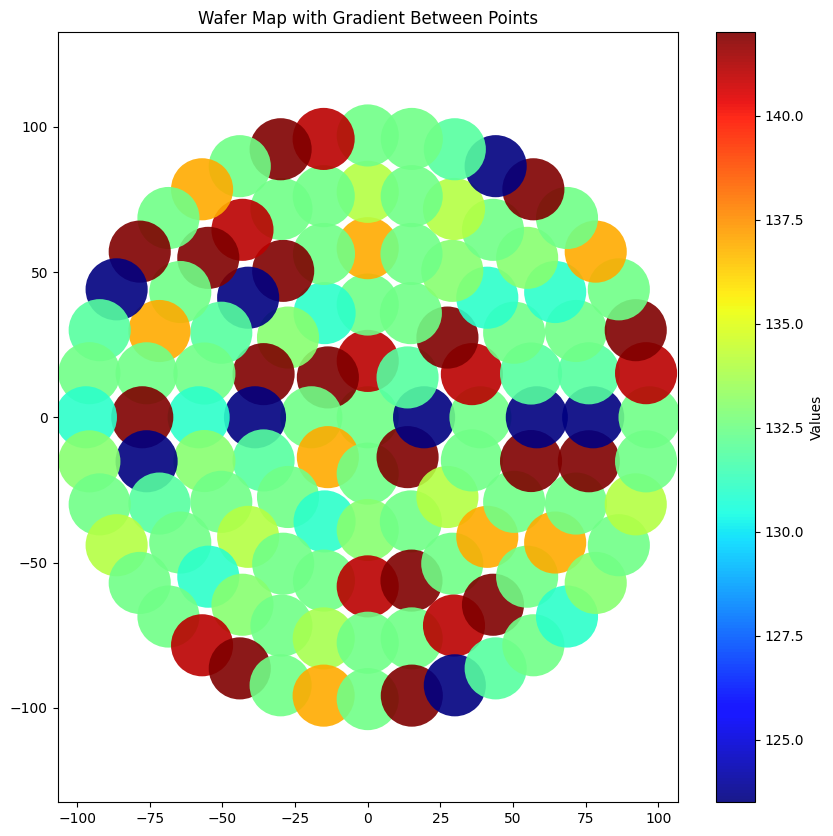

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

X = [
    0.00000000, 2.376E-15, -13.717871, -19.400000, -13.717871, 0.00000000,
    13.7178715, 19.4000000, 13.7178715, 4.751E-15, -14.848117, -27.435743,
    -35.846525, -38.800000, -35.846525, -27.435743, -14.848117, 0.00000000,
    14.8481171, 27.4357431, 35.8465258, 38.8000000, 35.8465258, 27.4357431,
    14.8481171, -1.872E-14, -15.063268, -29.100000, -41.153614, -50.402678,
    -56.216883, -58.200000, -56.216883, -50.402678, -41.153614, -29.100000,
    -15.063268, 0.00000000, 15.0632684, 29.1000000, 41.1536146, 50.4026785,
    56.2168830, 58.2000000, 56.2168830, 50.4026785, 41.1536146, 29.1000000,
    15.0632684, -5.942E-14, -15.139008, -29.696234, -43.112250, -54.871486,
    -64.522041, -71.693051, -76.108937, -77.600000, -76.108937, -71.693051,
    -64.522041, -54.871486, -43.112250, -29.696234, -15.139008, 0.00000000,
    15.1390089, 29.6962343, 43.1122500, 54.8714862, 64.5220419, 71.6930517,
    76.1089377, 77.6000000, 76.1089377, 71.6930517, 64.5220419, 54.8714862,
    43.1122500, 29.6962343, 15.1390089, 1.188E-14, -15.174143, -29.974648,
    -44.037078, -57.015169, -68.589357, -78.474648, -86.427632, -92.252482,
    -95.805769, -97.000000, -95.805769, -92.252482, -86.427632, -78.474648,
    -68.589357, -57.015169, -44.037078, -29.974648, -15.174143, 0.00000000,
    15.1741431, 29.9746484, 44.0370784, 57.0151694, 68.5893577, 78.4746484,
    86.4276328, 92.2524820, 95.8057690, 97.0000000, 95.8057690, 92.2524820,
    86.4276328, 78.4746484, 68.5893577, 57.0151694, 44.0370784, 29.9746484,
    15.1741431
]

# y 좌표
Y = [
    0.00000000, 19.4000000, 13.7178715, 3.564E-15, -13.717871, -19.400000, -13.717871, -1.188E-15, 
    13.7178715, 38.8000000, 35.8465258, 27.4357431, 14.8481171, 7.127E-15, -14.848117, -27.435743, 
    -35.846525, -38.800000, -35.846525, -27.435743, -14.848117, -2.376E-15, 14.8481171, 27.4357431, 
    35.8465258, 58.2000000, 56.2168830, 50.4026785, 41.1536146, 29.1000000, 15.0632684, 1.069E-14, 
    -15.063268, -29.100000, -41.153614, -50.402678, -56.216883, -58.200000, -56.216883, -50.402678, 
    -41.153614, -29.100000, -15.063268, -1.649E-14, 15.0632684, 29.1000000, 41.1536146, 50.4026785, 
    56.2168830, 77.6000000, 76.1089377, 71.6930517, 64.5220419, 54.8714862, 43.1122500, 29.6962343, 
    15.1390089, -1.925E-13, -15.139008, -29.696234, -43.112250, -54.871486, -64.522041, -71.693051, 
    -76.108937, -77.600000, -76.108937, -71.693051, -64.522041, -54.871486, -43.112250, -29.696234, 
    -15.139008, -4.751E-15, 15.1390089, 29.6962343, 43.1122500, 54.8714862, 64.5220419, 71.6930517, 
    76.1089377, 97.0000000, 95.8057690, 92.2524820, 86.4276328, 78.4746484, 68.5893577, 57.0151694, 
    44.0370784, 29.9746484, 15.1741431, 1.782E-14, -15.174143, -29.974648, -44.037078, -57.015169, 
    -68.589357, -78.474648, -86.427632, -92.252482, -95.805769, -97.000000, -95.805769, -92.252482, 
    -86.427632, -78.474648, -68.589357, -57.015169, -44.037078, -29.974648, -15.174143, -5.939E-15, 
    15.1741431, 29.9746484, 44.0370784, 57.0151694, 68.5893577, 78.4746484, 86.4276328, 92.2524820, 
    95.8057690
]

# 엑셀 파일에서 값을 읽어옴
df = pd.read_excel('c:/121.xlsx', engine='openpyxl')

# 값들을 리스트로 변환
values = df['value'].tolist()




# 웨이퍼 맵 그리기
plt.figure(figsize=(10, 10))

# 포인트의 크기 설정 (더 큰 값으로 조절)
point_size = 2000  # 이 값을 조절하여 포인트의 크기를 더 크게 할 수 있습니다.

# 커스텀 컬러 맵 생성
cmap = plt.get_cmap('jet')
normalize = plt.Normalize(vmin=min(values), vmax=max(values))
colors = cmap(normalize(values))

# 포인트 플롯을 사용하여 웨이퍼 맵 그리기
scatter = plt.scatter(X, Y, c=values, cmap=cmap, s=point_size, norm=normalize, alpha=0.9, edgecolor='none')

# 컬러바 설정
cbar = plt.colorbar(scatter)
cbar.set_label('Values')

# 웨이퍼 맵 스타일 설정
plt.axis('equal')
plt.title('Wafer Map with Gradient Between Points')
plt.show()